<a href="https://colab.research.google.com/github/angeland001/Personal-Bio/blob/main/AssignmentTwoCPSC4430.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
from torchvision.transforms import Compose
from torch.utils.data import DataLoader
import torchvision
import numpy as np
import torch.optim as optim
import torch

In [2]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),           # Random cropping
    transforms.RandomHorizontalFlip(),             # Random horizontal flipping
    transforms.ColorJitter(brightness=0.2,         # Color jittering
                           contrast=0.2,
                           saturation=0.2,
                           hue=0.2),
    transforms.ToTensor(),                         # Convert PIL Image to tensor
    transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.507, 0.487, 0.441], std=[0.267, 0.256, 0.276])
])

In [3]:
training_data = datasets.CIFAR100(
    root="./data",
    train=True,
    download=True,
    transform= transform_train
)

Files already downloaded and verified


In [4]:
testing_data = datasets.CIFAR100(
    root="./data",
    train=False,
    download=True,
    transform=transform_test
)


Files already downloaded and verified


In [40]:
labels = list(training_data.classes)

In [41]:
labels

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [7]:
trainloader = DataLoader(training_data, batch_size=64,shuffle=True)
testloader = DataLoader(testing_data, batch_size=64, shuffle=True)

In [8]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


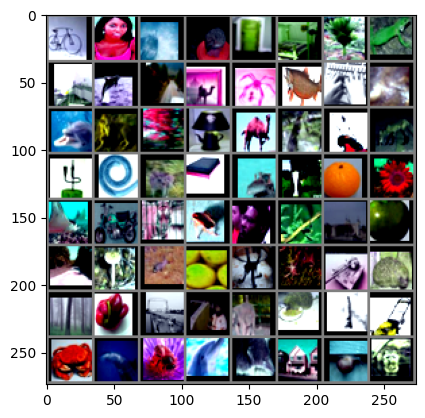

In [9]:
def showimg(img):
  img = img / 2 + 0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

trainingimages, traininglabels = next(iter(trainloader))
showimg(torchvision.utils.make_grid(trainingimages))


In [10]:


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.output = nn.Linear(512, 100)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))  # Applying ReLU activation
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)  # Applying max pooling
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = nn.functional.relu(self.conv3(x))
        x = nn.functional.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 128 * 4 * 4)
        x = nn.functional.relu(self.fc1(x))
        logits = self.output(x)
        return logits



In [11]:
model = CNN()

In [12]:
model

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (output): Linear(in_features=512, out_features=100, bias=True)
)

In [13]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [15]:
model.train()
num_epochs = 40
for i in range(num_epochs):
  correct_total = 0
  total_samples = 0
  running_loss = 0.0
  for _, data in enumerate(trainloader,0):
    inputs,labels = data
    optimizer.zero_grad()
    outputs = model(inputs)
    loss_function = loss(outputs,labels)
    loss_function.backward()
    optimizer.step()
    running_loss += loss_function.item()



    # Calculate accuracy
    _, predicted = torch.max(outputs, 1)
    correct_total += (predicted == labels).sum().item()
    total_samples += labels.size(0)

    epoch_loss = running_loss / len(trainloader)
    epoch_accuracy = correct_total / total_samples
    print(f"Epoch {i}/{num_epochs}, Loss: {epoch_loss:.3f}, Accuracy: {epoch_accuracy:.3f}")



Streaming output truncated to the last 5000 lines.
Epoch 33/40, Loss: 1.044, Accuracy: 0.527
Epoch 33/40, Loss: 1.047, Accuracy: 0.527
Epoch 33/40, Loss: 1.049, Accuracy: 0.527
Epoch 33/40, Loss: 1.051, Accuracy: 0.527
Epoch 33/40, Loss: 1.053, Accuracy: 0.527
Epoch 33/40, Loss: 1.055, Accuracy: 0.527
Epoch 33/40, Loss: 1.058, Accuracy: 0.527
Epoch 33/40, Loss: 1.060, Accuracy: 0.527
Epoch 33/40, Loss: 1.062, Accuracy: 0.526
Epoch 33/40, Loss: 1.064, Accuracy: 0.526
Epoch 33/40, Loss: 1.067, Accuracy: 0.526
Epoch 33/40, Loss: 1.068, Accuracy: 0.526
Epoch 33/40, Loss: 1.071, Accuracy: 0.526
Epoch 33/40, Loss: 1.074, Accuracy: 0.526
Epoch 33/40, Loss: 1.076, Accuracy: 0.526
Epoch 33/40, Loss: 1.078, Accuracy: 0.526
Epoch 33/40, Loss: 1.080, Accuracy: 0.526
Epoch 33/40, Loss: 1.082, Accuracy: 0.526
Epoch 33/40, Loss: 1.084, Accuracy: 0.526
Epoch 33/40, Loss: 1.086, Accuracy: 0.526
Epoch 33/40, Loss: 1.089, Accuracy: 0.526
Epoch 33/40, Loss: 1.091, Accuracy: 0.526
Epoch 33/40, Loss: 1.094,

In [19]:
torch.save(model.state_dict(), 'modelwith40epochs.pth')

In [20]:
def test_model(model, criterion, testloader):
    model.eval()
    correct_total = 0
    total_samples = 0
    running_loss = 0.0

    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = model(inputs)
            loss_function = loss(outputs, labels)
            running_loss += loss_function.item()

            _, predicted = torch.max(outputs, 1)
            correct_total += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    test_loss = running_loss / len(testloader)
    test_accuracy = correct_total / total_samples
    print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.3f}")

# Usage:
test_model(model, loss, testloader)


Test Loss: 1.972, Test Accuracy: 0.506


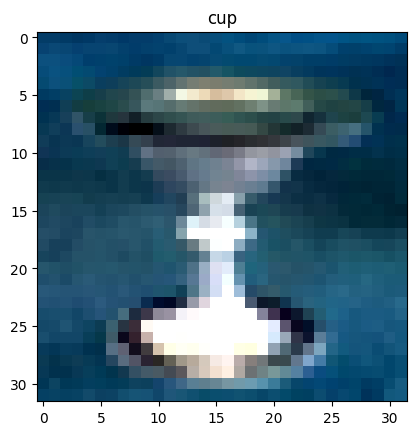

Original Label: cup
Predicted Label: cup


In [48]:
# Define a function to display images with labels
def imshow_with_labels(img, label):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(labels[label])  # Use classes[label] instead of labels[label]
    plt.show()


def test_Image(model, image):
    model.eval()
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        _, predicted = torch.max(output, 1)
        return predicted.item()

# Select a batch of test images and labels
for testimages, testlabels in testloader:
    break  # Only take the first batch

# Select a random image from the batch for testing
idx = np.random.randint(len(testimages))
testimage = testimages[idx]
testlabel = testlabels[idx]

# Test the model on the selected image
predicted_label = test_Image(model, testimage)


# Display the image with its label
imshow_with_labels(testimage, testlabel.item())
print("Original Label:", labels[testlabel.item()])
print("Predicted Label:", labels[predicted_label])


